In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [ ]:
pts = np.array([np.random.uniform([-20, -20, 0], [20, 20, 5]) for _ in range(50)])  # Generate Nodes

G = nx.Graph()
for i in range(len(pts)):  # Add nodes to graph
    G.add_node(i, pos=tuple(pts[i]))

for i in range(len(pts)):  # Add edges to graph
        for j in range(i+1, len(pts)):
            if np.random.rand() < 0.08:  # Randomly decide to add edges (this is meant to roughly replicate the road network)
                distance = np.linalg.norm(pts[i] - pts[j])
                G.add_edge(i, j, distance=distance)

In [3]:
def generate_points_uniformly(min, max, num_points, display_plot=False): 
  """Generates points uniformly on a 2D grid.

  Args:
    grid_size: The size of the grid.
    num_points: The number of points to generate.

  Returns:
    A numpy array of shape (num_points, 2) containing the coordinates of the generated points.
  """

  x_coords = np.random.uniform(min, max, num_points)
  y_coords = np.random.uniform(min, max, num_points)
  points = np.column_stack((x_coords, y_coords))
  
  if display_plot:
    # Plot the points
    plt.scatter(points[:, 0], points[:, 1])
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.title("Uniformly Generated Points on a 2D Grid")
    plt.show()
  
  return points

In [4]:
points = generate_points_uniformly(-10, 10, 20)

In [5]:
def create_graph_from_points(points):
  """Creates a graph from a list of points.

  Args:
    points: A list of tuples (x, y) representing the coordinates of the points.

  Returns:
    A networkx Graph object.
  """
  
  G = nx.Graph()
  for i, point in enumerate(points):
      G.add_node(i, position=point)
  
  return G

In [6]:
def create_complete_graph2(points):
    G = nx.Graph()
    for i in range(len(points)):
        G.add_node(i, position=(points[i][0], points[i][1]))

    for i in range(len(points)):
        for j in range(i+1, len(points)):
            distance = np.linalg.norm(points[i] - points[j])
            G.add_edge(i, j, weight=distance)
    
    return G

In [7]:
graph = create_graph_from_points(points)
# graph.clear_edges()

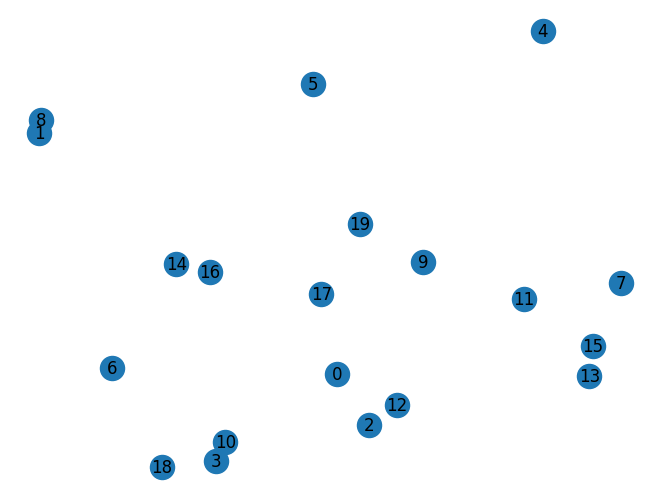

In [8]:
pos = nx.get_node_attributes(graph, 'position')
nx.draw(graph, pos=pos, with_labels=True)
plt.show()

In [9]:
graph_complete = nx.complete_graph(graph)
for i in pos:
    graph_complete.nodes[i]['position'] = graph.nodes[i]['position']

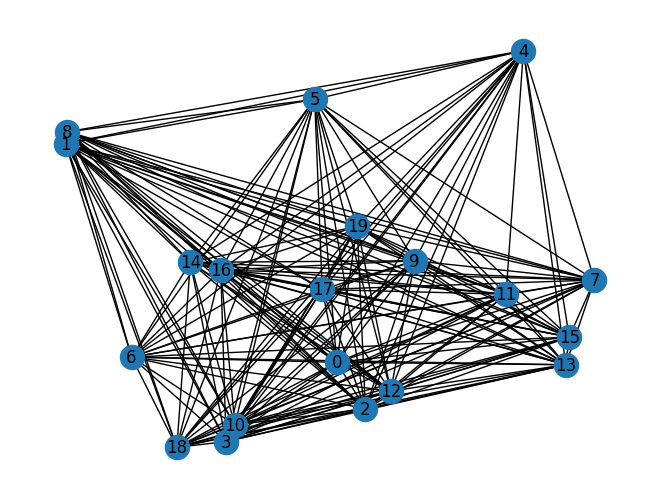

In [10]:
pos = nx.get_node_attributes(graph_complete, 'position')
nx.draw(graph_complete, pos=pos, with_labels=True)
plt.show()

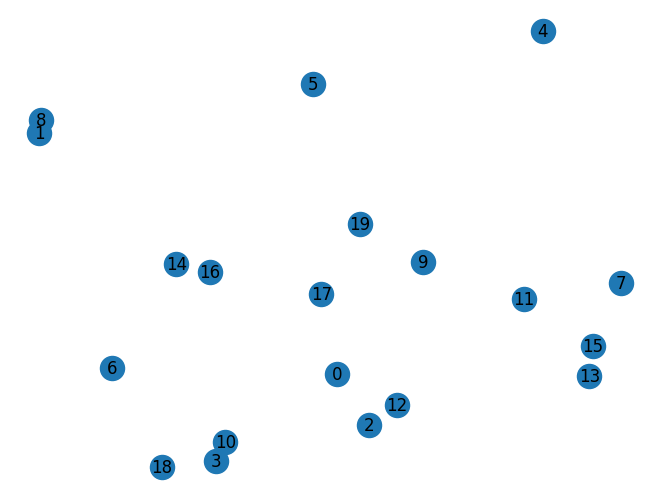

In [11]:
T = nx.minimum_spanning_tree(graph)
pos = {i: points[i] for i in range(len(points))}
nx.draw(T, pos=pos, with_labels=True)
plt.show()

In [120]:
positions = nx.get_node_attributes(graph, 'position')

In [121]:
positions

{0: array([8.32309177, 1.7921296 ]),
 1: array([-1.99640603,  5.32239849]),
 2: array([-0.74832408,  4.35311653]),
 3: array([ 6.16488157, -2.05812506]),
 4: array([5.5564231 , 7.46605402]),
 5: array([2.15184138, 9.49900569]),
 6: array([-3.85690177, -6.43670268]),
 7: array([-9.75358782, -1.61046304]),
 8: array([8.4430213 , 8.28715533]),
 9: array([-7.44323476, -7.32828085]),
 10: array([-8.28439159, -3.42624561]),
 11: array([6.78236646, 9.59961023]),
 12: array([-2.81087022,  3.17146485]),
 13: array([1.02992774, 1.05077702]),
 14: array([-4.65604067,  7.07068616]),
 15: array([ 7.24857469, -7.94799798]),
 16: array([-5.96581866,  5.23061606]),
 17: array([-6.5432452 ,  5.76356099]),
 18: array([-8.70568025,  5.82005641]),
 19: array([-2.18738917, -0.77857955])}

In [ ]:
data = [positions[node] for node in graph.nodes()]
model_hc = AgglomerativeClustering(n_clusters=4, linkage='average')
labels_hc = model_hc.fit_predict(data)

In [148]:
[node for node in graph_complete.nodes]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [145]:
positions = np.array([(graph_complete.nodes[i]['position'][0], graph_complete.nodes[i]['position'][1]) for i in graph_complete.nodes.keys()])
kmeans = KMeans(n_clusters=3)
kmeans.fit(positions)
# Assign cluster labels to nodes
# nx.set_node_attributes(graph_complete, 'cluster', dict(enumerate(kmeans.labels_)))

kmeans.labels_

array([1, 0, 0, 1, 1, 0, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2],
      dtype=int32)

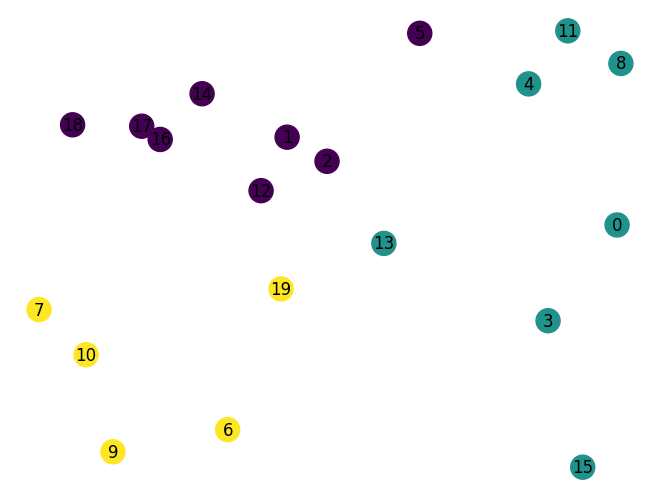

In [150]:
# Color nodes based on cluster labels
node_colors = [kmeans.labels_[i] for i in graph_complete.nodes]
nx.draw(graph_complete, pos=pos, node_color=node_colors, with_labels=True)
plt.show()

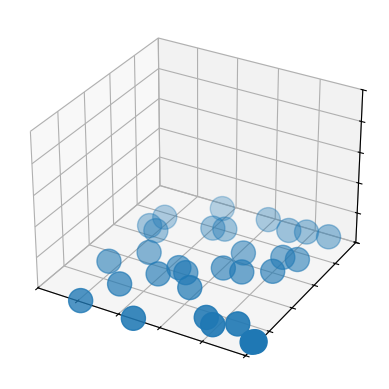

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Generate random 3D points
num_points = 30

points = np.random.rand(num_points, 3)

# Create a NetworkX graph
G = nx.Graph()
for i in range(num_points):
    G.add_node(i, pos=tuple(points[i]))

# Visualize the graph in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'pos'), ax=ax)

# Adjust the plot limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.show()

In [39]:
pts = np.array([np.random.uniform([-20, -20, 0], [20, 20, 5]) for _ in range(50)])
G = nx.Graph()
for i in range(len(pts)):
    G.add_node(i, pos=tuple(pts[i]))

for i in range(len(pts)):
        for j in range(i+1, len(pts)):
            distance = np.linalg.norm(pts[i] - pts[j])
            G.add_edge(i, j, distance=distance)


In [40]:
A = nx.adjacency_matrix(G, weight='distance')

In [42]:
elevations = np.array([node.get_attr for node in G.nodes])
elev_sorted = np.argsort(elevations)[:5]

TypeError: 'int' object is not subscriptable

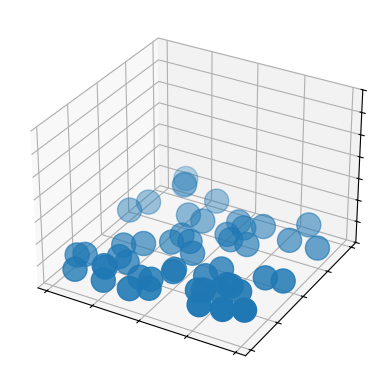

In [17]:
# Create a NetworkX graph
G = nx.Graph()
for i in range(len(pts)):
    G.add_node(i, pos=tuple(pts[i]))

# Visualize the graph in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'pos'), ax=ax)

# Adjust the plot limits
ax.set_xlim([-22, 22])
ax.set_ylim([-22, 22])
ax.set_zlim([-1, 6])

plt.show()